# Trabajo práctico integrador - Análisis de datos
## Carrera de Especialización En Inteligencia Artificial - Cohorte 17
### Autores:
* Horn, Martin
* Lloveras, Alejandro
* Méndez, Diego Martín
* Micozzi, María Luz

El dataset contiene más de 30000 registros de canciones de Spotify de 6 categorias (EDM, Latin, Pop, R&B, Rap y Rock) tomados por medio de la API de Spotify.

El dataset cuenta con información actualizada a fines del 2023.

Nos centraremos en el campo track_popularity y buscaremos su relación con otros campos que describen las características musicales como: key, tempo, danceability, energy, etc.; o el género/subgénero y año de lanzamiento.

### Campos:

| Variable                  | Descripción                                                                                                                                                                                                                                     |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `track_id`                | ID único de la canción                                                                                                                                                                                                                          |
| `track_name`              | Nombre de la canción                                                                                                                                                                                                                             |
| `track_artist`            | Artista de la canción                                                                                                                                                                                                                            |
| `track_popularity`        | Popularidad de la canción (0-100), donde un valor más alto indica una mayor popularidad                                                                                                                                                         |
| `track_album_id`          | ID único del álbum                                                                                                                                                                                                                               |
| `track_album_name`        | Nombre del álbum de la canción                                                                                                                                                                                                                  |
| `track_album_release_date`| Fecha de lanzamiento del álbum                                                                                                                                                                                                                   |
| `playlist_name`           | Nombre de la lista de reproducción                                                                                                                                                                                                              |
| `playlist_id`             | ID de la lista de reproducción                                                                                                                                                                                                                   |
| `playlist_genre`          | Género de la lista de reproducción                                                                                                                                                                                                               |
| `playlist_subgenre`       | Subgénero de la lista de reproducción                                                                                                                                                                                                            |
| `danceability`            | Describe qué tan adecuada es una pista para bailar, basándose en una combinación de elementos musicales. Un valor de 0.0 es menos bailable y 1.0 es más danceable.                                                            |
| `energy`                  | La energía es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Típicamente, las pistas energéticas se sienten rápidas y ruidosas.                                                                 |
| `key`                     | La tonalidad general estimada de la pista. Los enteros se asignan a notas utilizando la notación estándar de Clase de Tonos. Ej. 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detecta tonalidad, el valor es -1.                          |
| `loudness`                | La sonoridad general de una pista en decibelios (dB). Los valores típicos oscilan entre -60 y 0 dB.                                                                                     |
| `mode`                    | El modo indica la modalidad (mayor o menor) de una pista. Mayor está representado por 1 y menor por 0.                                                                                  |
| `speechiness`             | La presencia de palabras habladas en una pista. Los valores por encima de 0.66 describen pistas que probablemente están hechas completamente de palabras habladas.                                                                           |
| `acousticness`            | Una medida de confianza de 0.0 a 1.0 sobre si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.                                                     |
| `instrumentalness`        | Predice si una pista no contiene voces. Valores por encima de 0.5 están destinados a representar pistas instrumentales.                                                                  |
| `liveness`                | Detecta la presencia de una audiencia en la grabación. Un valor superior a 0.8 proporciona una alta probabilidad de que la pista sea en vivo.                                          |
| `valence`                 | Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas). |
| `tempo`                   | El tempo estimado general de una pista en beats por minuto (BPM).                                                                                                                      |
| `duration_ms`             | Duración de la canción en milisegundos                                                                                                                                                                                                          |


In [478]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [479]:
# leer CSV
df = pd.read_csv('spotify_songs.csv')

## Exploración y Comprensión de los Datos

In [480]:
df.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [482]:
df.head(3)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   

   track_artist  track_popularity          track_album_id  \
0    Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1      Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2  Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   

  playlist_name             playlist_id playlist_genre playlist_subgenre  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000000    0.0653    0.518  122.036       194754  
1          0.004210    0.3570    0.693   99.972       162600  
2          0.000023    0.1100    0.613  124.008       176616

In [483]:
df.sample(3)

track_id                            track_name  \
11013  08ilexedmUuccTWTeK7Dvb  John C: Bzrp Music Sessions, Vol. 18   
612    3fNuYHHay5uUISA3fePcTH   Top of the World - Erlandsson Remix   
18806  2ksOAxtIxY8yElEWw8RhgK                                 China   

      track_artist  track_popularity          track_album_id  \
11013     Bizarrap                75  7CA7hm8MUMLgwGysiPKYT1   
612           Vide                46  5gtWCP8NSYjUQm3hu7sROF   
18806     Anuel AA                93  1PTTAq0OxggVgqP5WTYWDh   

                           track_album_name track_album_release_date  \
11013  John C: Bzrp Music Sessions, Vol. 18               2019-11-20   
612          Top of the World (The Remixes)               2020-01-03   
18806                                 China               2019-07-19   

                         playlist_name             playlist_id playlist_genre  \
11013  Trap Argentino - Trap Argentina  6ltss0ThreZ3uIMn5mr4Tm            rap   
612                        Pop / Dance  6mXh8CUBMBsBUu88a4eAQV            pop   
18806                Mansión Reggaetón  37i9dQZF1DWZjqjZMudx9T          latin   

      playlist_subgenre  danceability  energy  key  loudness  mode  \
11013              trap         0.698   0.714   11    -6.178     1   
612           dance pop         0.379   0.565    1    -8.060     1   
18806         reggaeton         0.786   0.808    7    -3.702     1   

       speechiness  acousticness  instrumentalness  liveness  valence  \
11013       0.3670        0.3680          0.000000    0.0824    0.864   
612         0.0415        0.5860          0.000000    0.1030    0.385   
18806       0.0882        0.0846          0.000289    0.0822    0.609   

         tempo  duration_ms  
11013  112.856       133692  
612     86.008       172500  
18806  105.027       301714

In [484]:
df.tail(3)

track_id                      track_name  track_artist  \
32830  7ImMqPP3Q1yfUHvsdn7wEo    Sweet Surrender - Radio Edit   Starkillers   
32831  2m69mhnfQ1Oq6lGtXuYhgX  Only For You - Maor Levi Remix        Mat Zo   
32832  29zWqhca3zt5NsckZqDf6c          Typhoon - Original Mix  Julian Calor   

       track_popularity          track_album_id              track_album_name  \
32830                14  0ltWNSY9JgxoIZO4VzuCa6  Sweet Surrender (Radio Edit)   
32831                15  1fGrOkHnHJcStl14zNx8Jy        Only For You (Remixes)   
32832                27  0X3mUOm6MhxR7PzxG95rAo                 Typhoon/Storm   

      track_album_release_date    playlist_name             playlist_id  \
32830               2014-04-21  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32831               2014-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32832               2014-03-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre          playlist_subgenre  danceability  energy  key  \
32830            edm  progressive electro house         0.529   0.821    6   
32831            edm  progressive electro house         0.626   0.888    2   
32832            edm  progressive electro house         0.603   0.884    5   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
32830    -4.899     0       0.0481      0.108000          0.000001     0.150   
32831    -3.361     1       0.1090      0.007920          0.127000     0.343   
32832    -4.571     0       0.0385      0.000133          0.341000     0.742   

       valence    tempo  duration_ms  
32830   0.4360  127.989       210112  
32831   0.3080  128.008       367432  
32832   0.0894  127.984       337500

### Comprensión de features musicales del dataset

Exploramos los valores máximos y minimos de features específicos, aprovechando la posibilidad de buscar las canciones en Spotify para escucharlas.

In [485]:
# Speechiness
max_speechiness = df['speechiness'].max()

# Obtenemos las canciones con el valor maximo de 'speechiness'
tracks_with_max_speechiness = df[df['speechiness'] == max_speechiness]

tracks_with_max_speechiness

track_id track_name track_artist  track_popularity  \
25705  5ZbJR1AfdOsvsYNuCvgqKX   I'M DEAD     Duckwrth                59   

               track_album_id track_album_name track_album_release_date  \
25705  1JqHKxNhfBv3ZIz1VwhENp        I'M UUGLY               2016-09-23   

                     playlist_name             playlist_id playlist_genre  \
25705  Groovy // Funky // Neo-Soul  0JmBB9HfrzDiZoPVRdv8ns            r&b   

      playlist_subgenre  danceability  energy  key  loudness  mode  \
25705          neo soul         0.593   0.751    4    -9.414     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
25705        0.918         0.707               0.0     0.356    0.485   

         tempo  duration_ms  
25705  114.907       230632

Se aprecia que la variable 'speechiness' describe canciones con gran presencia de la voz (generalmente rapeadas).

In [486]:
# Acousticness
min_acousticness = df['acousticness'].min()

# Obtenemos las canciones con el valor maximo de 'acousticness'
tracks_with_min_acousticness = df[df['acousticness'] == min_acousticness]

tracks_with_min_acousticness

track_id             track_name      track_artist  \
11363  51w6nRCU68klqNfYaaVP2j  Hi, How're You Doin'?  DREAMS COME TRUE   

       track_popularity          track_album_id  track_album_name  \
11363                 0  4wdK52JVu5GzhxW3RCZ3AV  Dreams Come True   

      track_album_release_date          playlist_name             playlist_id  \
11363               1989-03-21  City Pop 1985 シティーポップ  3j2osvmecEao5nmo9jZ5df   

      playlist_genre playlist_subgenre  danceability  energy  key  loudness  \
11363           rock        album rock           0.0   0.315    1   -26.087   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
11363     1          0.0           0.0               0.0       0.0      0.0   

       tempo  duration_ms  
11363    0.0         4000

In [487]:
# Instrumentalness
min_instrumentalness = df['instrumentalness'].min()

# Obtenemos las canciones con el valor maximo de 'instrumentalness'
tracks_with_min_instrumentalness = df[df['instrumentalness'] == min_instrumentalness]

tracks_with_min_instrumentalness

track_id  \
0      6f807x0ima9a1j3VPbc7VN   
4      1e8PAfcKUYoKkxPhrHqw4x   
5      7fvUMiyapMsRRxr07cU8Ef   
6      2OAylPUDDfwRGfe0lYqlCQ   
9      1IXGILkPm0tOCNeq00kCPa   
...                       ...   
32802  3Gwq0zKnMWluOEPKh93BeC   
32811  353JGhRW6ahVU3DpCxOjqW   
32813  5sYzg83Vy4IW4TfE9jwk8g   
32827  0aBDrRTgDCwWbcOnEIp7DJ   
32828  7bxnKAamR3snQ1VGLuVfC1   

                                              track_name  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...   
4                Someone You Loved - Future Humans Remix   
5      Beautiful People (feat. Khalid) - Jack Wins Remix   
6                        Never Really Over - R3HAB Remix   
9                    If I Can't Have You - Gryffin Remix   
...                                                  ...   
32802                                        Lost At Sea   
32811                                Utopia - Radio Edit   
32813                            Invincible - Radio Edit   
32827                             Many Ways - Radio Edit   
32828               City Of Lights - Official Radio Edit   

                              track_artist  track_popularity  \
0                               Ed Sheeran                66   
4                            Lewis Capaldi                69   
5                               Ed Sheeran                67   
6                               Katy Perry                62   
9                             Shawn Mendes                67   
...                                    ...               ...   
32802                                 Zedd                51   
32811                              Qubicon                11   
32813                             Borgeous                 0   
32827  Ferry Corsten feat. Jenny Wahlstrom                27   
32828                         Lush & Simon                42   

               track_album_id  \
0      2oCs0DGTsRO98Gh5ZSl2Cx   
4      7m7vv9wlQ4i0LFuJiE2zsQ   
5      2yiy9cd2QktrNvWC2EUi0k   
6      7INHYSeusaFlyrHSNxm8qH   
9      4QxzbfSsVryEQwvPFEV5Iu   
...                       ...   
32802  7juWTdmjo0vYywWu8HiQxs   
32811  466ziBbv68mP56uJom8uSL   
32813  3NArAQULJ5BMoR8YY5UdWA   
32827  59XOfNjuYZB6feC6QUzS3e   
32828  2azRoBBWEEEYhqV6sb7JrT   

                                        track_album_name  \
0      I Don't Care (with Justin Bieber) [Loud Luxury...   
4                Someone You Loved (Future Humans Remix)   
5      Beautiful People (feat. Khalid) [Jack Wins Remix]   
6                        Never Really Over (R3HAB Remix)   
9                    If I Can't Have You (Gryffin Remix)   
...                                                  ...   
32802                                            Clarity   
32811                                             Utopia   
32813                                         Invincible   
32827                                          Many Ways   
32828                         City Of Lights (Vocal Mix)   

      track_album_release_date    playlist_name             playlist_id  \
0                   2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4                   2019-03-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
5                   2019-07-11        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
6                   2019-07-26        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
9                   2019-06-20        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                        ...              ...                     ...   
32802               2012-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32811               2014-03-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32813               2014-02-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32827                     2013  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32828               2014-04-28  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre          playlist_subgenre  danceability  energy  key  \
0                pop                 

In [488]:
# Liveness
max_liveness = df['liveness'].max()

# Obtenemos las canciones con el valor maximo de 'liveness'
tracks_with_max_liveness = df[df['liveness'] == max_liveness]

tracks_with_max_liveness

track_id  \
11296  2da7wnI5OoV89TsdKMM81k   

                                              track_name   track_artist  \
11296  Knockin' On Heaven's Door - Live In London / 1992  Guns N' Roses   

       track_popularity          track_album_id  track_album_name  \
11296                50  3ZwjaVcnVo2TwhK8N8WWVs  Live Era '87-'93   

      track_album_release_date          playlist_name             playlist_id  \
11296               1999-01-01  This Is Guns N' Roses  37i9dQZF1DX74DnfGTwugU   

      playlist_genre playlist_subgenre  danceability  energy  key  loudness  \
11296           rock        album rock         0.271   0.891    6    -6.011   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
11296     1       0.0824       0.00188            0.0157     0.996    0.365   

         tempo  duration_ms  
11296  147.509       447160

In [489]:
# Valence
max_valence = df['valence'].min()

# Obtenemos las canciones con el valor maximo de 'valence'
tracks_with_max_valence = df[df['valence'] == max_valence]

tracks_with_max_valence

track_id             track_name      track_artist  \
11363  51w6nRCU68klqNfYaaVP2j  Hi, How're You Doin'?  DREAMS COME TRUE   

       track_popularity          track_album_id  track_album_name  \
11363                 0  4wdK52JVu5GzhxW3RCZ3AV  Dreams Come True   

      track_album_release_date          playlist_name             playlist_id  \
11363               1989-03-21  City Pop 1985 シティーポップ  3j2osvmecEao5nmo9jZ5df   

      playlist_genre playlist_subgenre  danceability  energy  key  loudness  \
11363           rock        album rock           0.0   0.315    1   -26.087   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
11363     1          0.0           0.0               0.0       0.0      0.0   

       tempo  duration_ms  
11363    0.0         4000

## Técnicas de Visualización

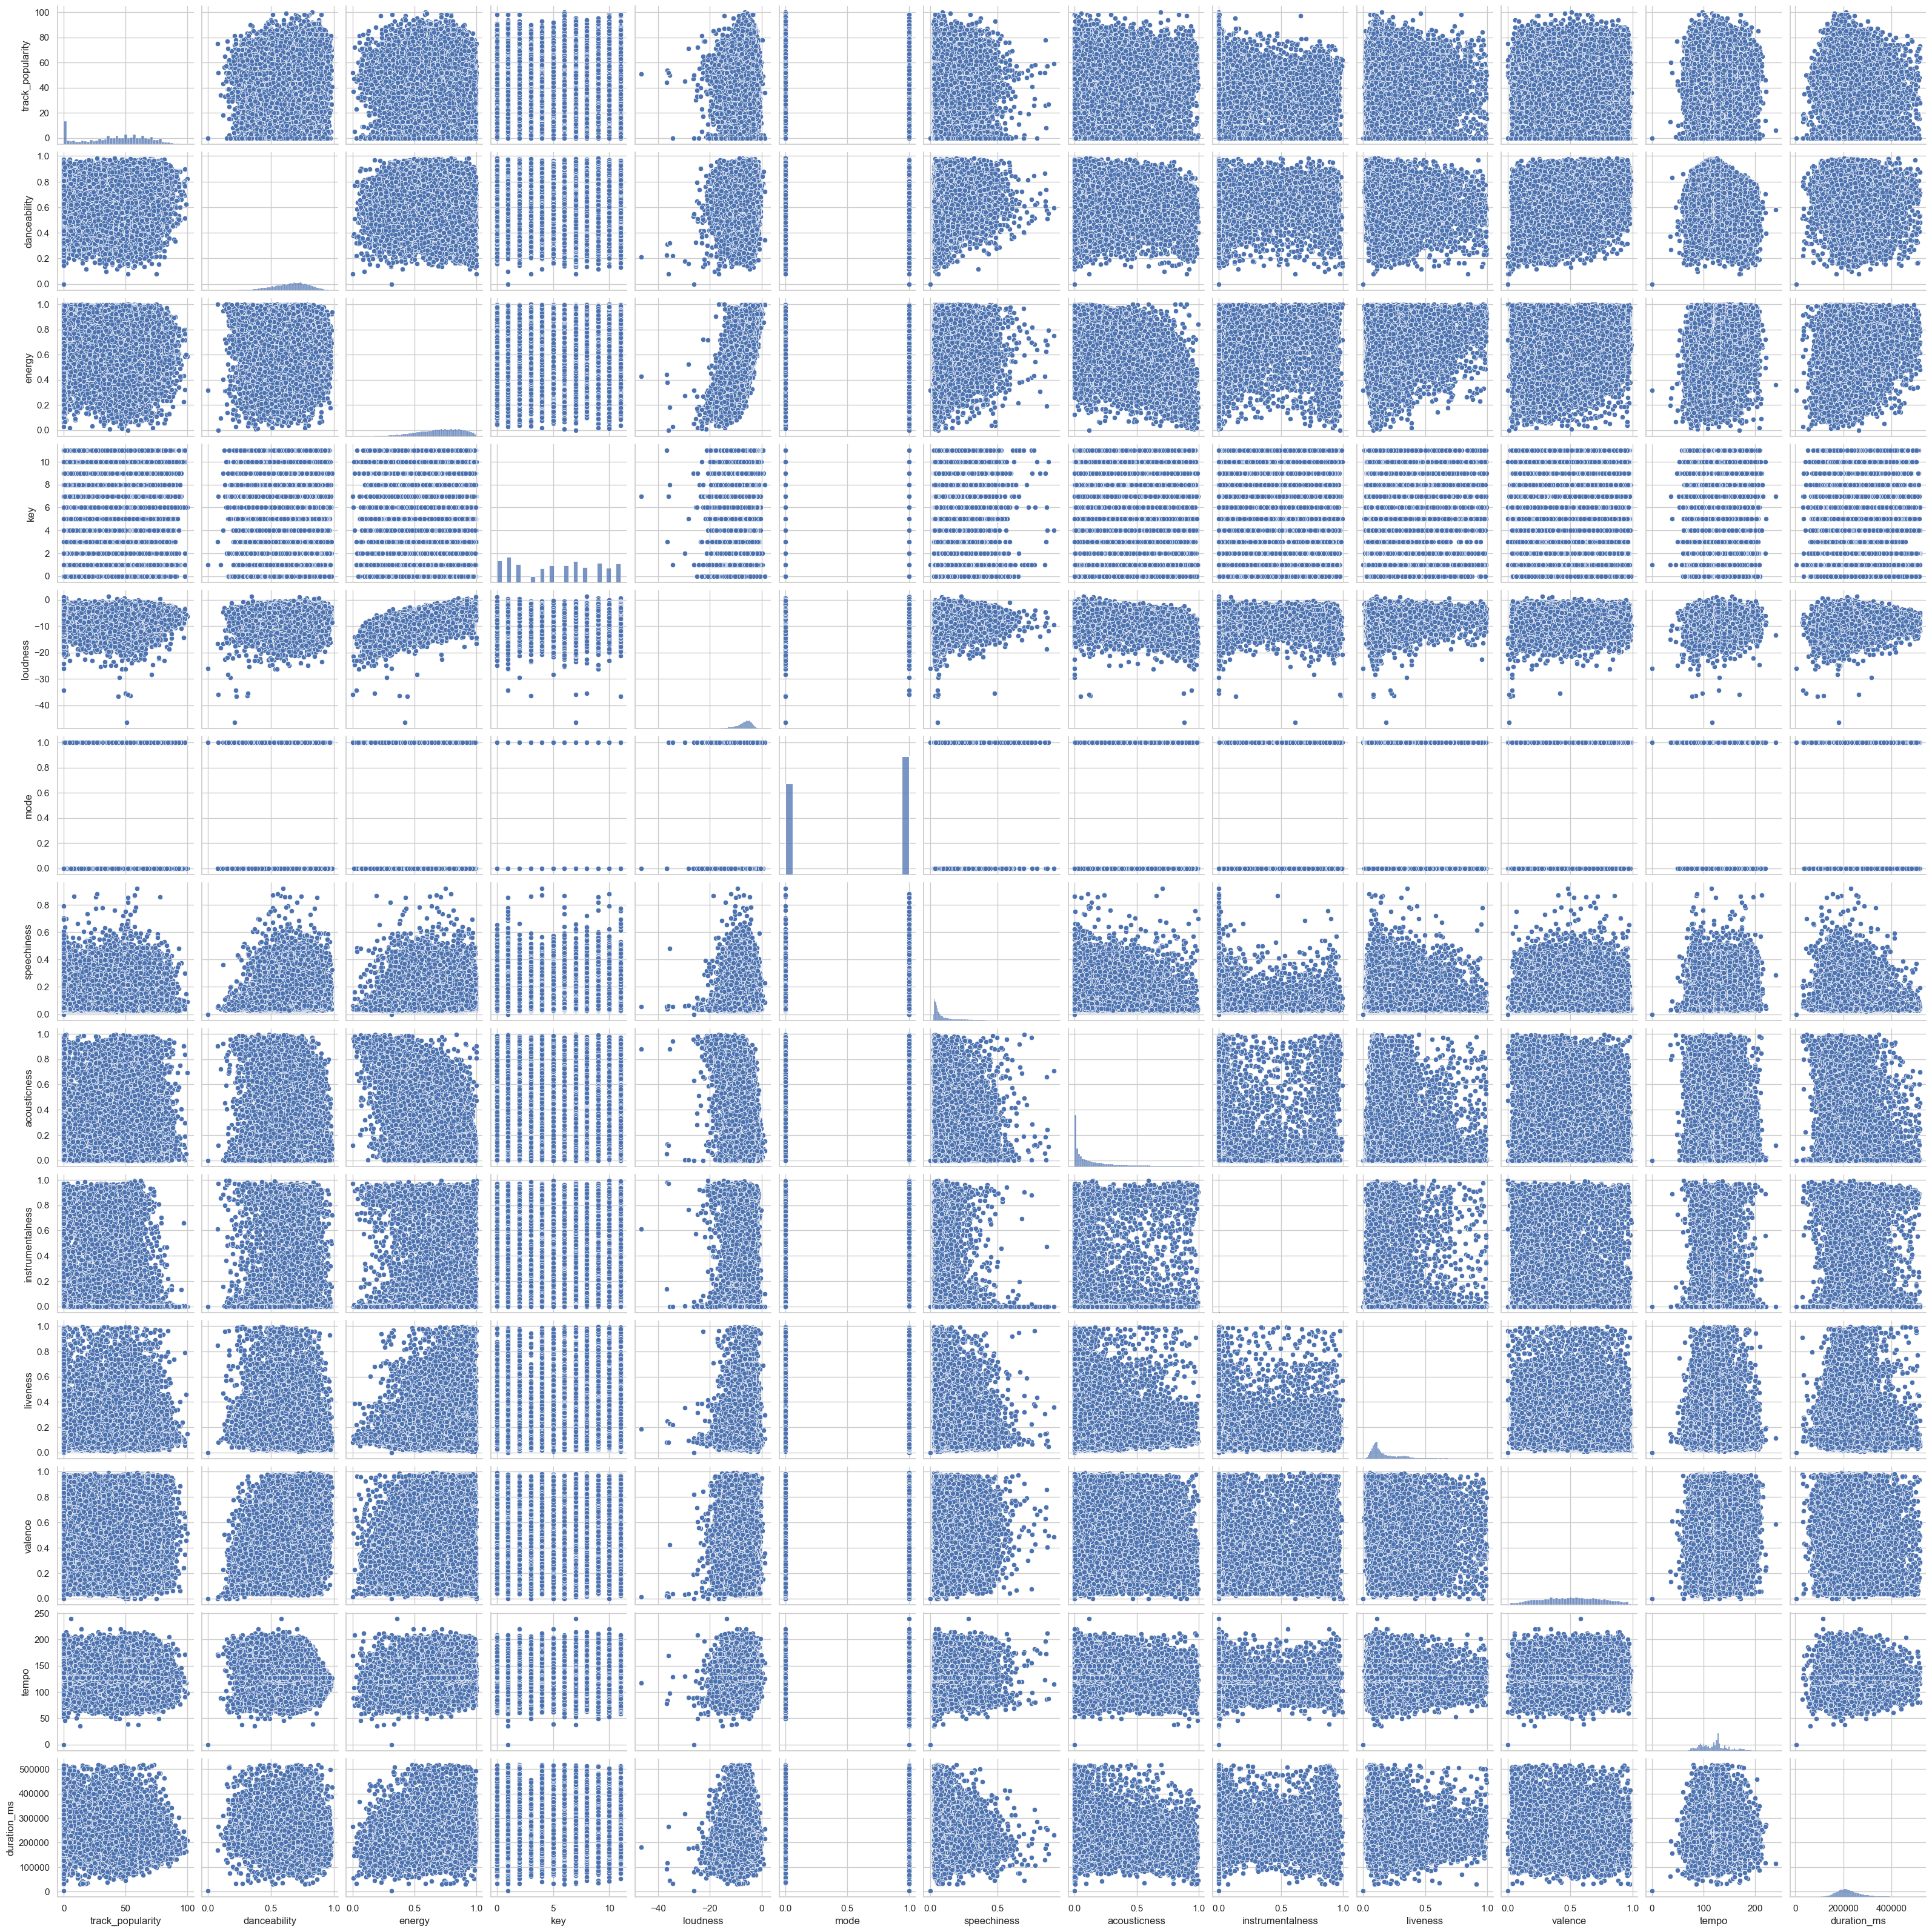

In [441]:
sns.pairplot(df)
plt.show()

Puede apreciarse que algunos features poseen gran cantidad de outliers. También es notable un sesgo en la distribución de ciertos features.

Nos interesa ver específicamente la relación entre 'track_popularity' y distintas features musicales.

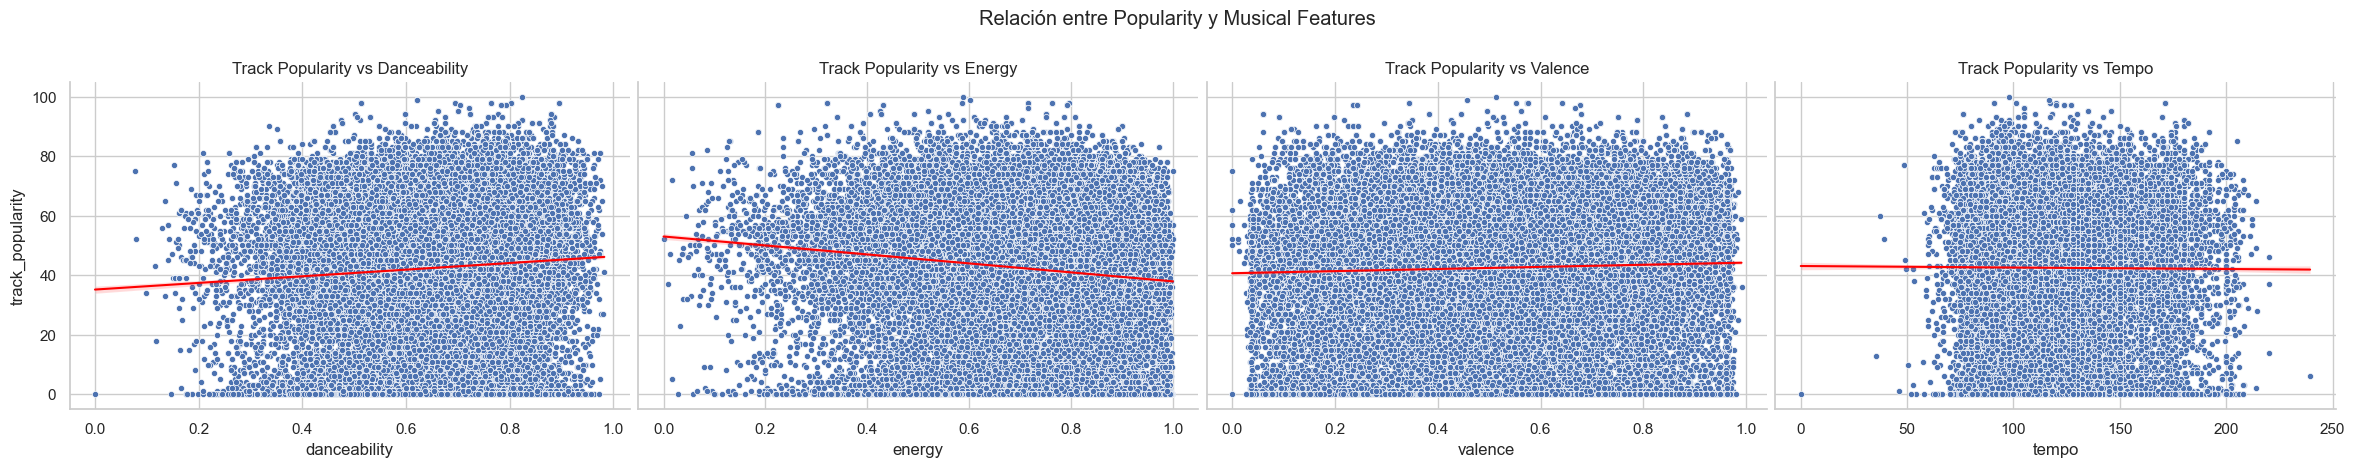

In [442]:
pp = sns.pairplot(df,
                 x_vars=['danceability', 'energy', 'valence', 'tempo'],
                 y_vars='track_popularity',
                 height=4,
                 aspect=1.5,  # Aspect ratio para agrandar los gráficos
                 kind='scatter',  # Scatter plot
                 plot_kws={'s': 20, 'edgecolor': 'w', 'linewidth': 0.5}
)

# Agregamos líneas de regresión
for ax in pp.axes.flat:
    sns.regplot(
        x=ax.collections[0].get_offsets()[:, 0],
        y=ax.collections[0].get_offsets()[:, 1],
        ax=ax,
        scatter=False,
        color='red',
        line_kws={'linewidth': 1.5}
    )

# Leyenda
for ax, feature in zip(pp.axes.flat, ['Danceability', 'Energy', 'Valence', 'Tempo']):
    ax.set_title(f'Track Popularity vs {feature}')
plt.suptitle('Relación entre Popularity y Musical Features', y=1.15)

plt.show()

Puede apreciarse que en todos los casos la correlación es muy baja. Puede concluirse que ni el Tempo ni la Valencia (positividad musical transmitida) tienen influencia sobre la popularidad.

Para 'Danceability' (musica bailable) y 'Energy' se aprecia una mínima correlación, pero no llega a ser determinante.

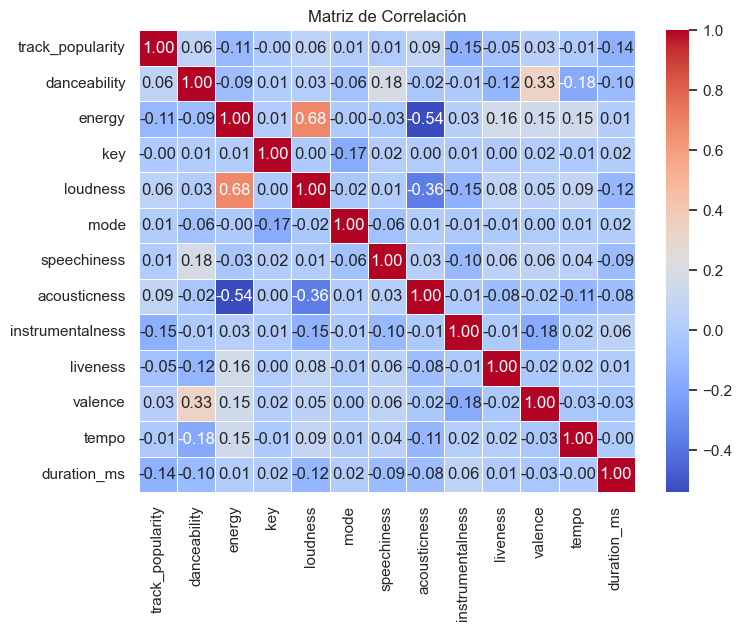

In [443]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Corroboramos la baja correlación entre la  mayoría de los features.

En los casos que se aprecia una correlación mayor (loudness/energy, acousticness/energy, loudness/acousticness), se trata de variables sintéticas, construidas en función de 'loudness' (parámetro acústico) y otras características del audio.

En el caso de 'valence/danceability' expresa una relación entre la música bailable y la "positividad" transmitida por la pista.

Podemos ver que 'track_popularity' presenta una baja correlación con todas las variables.
Sólo se aprecia una relación levemente mayor para: instrumentalness, duration_ms y energy.

Hipótesis:
- Relación 'instrumentalness/track_popularity': la música cantada (no instrumental) suele ser levemente más popular.
- Relación 'duration_ms/track_popularity': tienden a preferirse las canciones de una duración corta.
- Relación 'energy/track_popularity': a igualdad de condiciones, la pista con mayor volumen es preferida por los oyentes.

Cabe destacar que todas estas correlaciones son mínimas (menores a +/- 0.15).



En el pairplot se observó que algunos valores se encontraban con una distribución sesgada, por lo cual decidimos analizarlos en detalle.

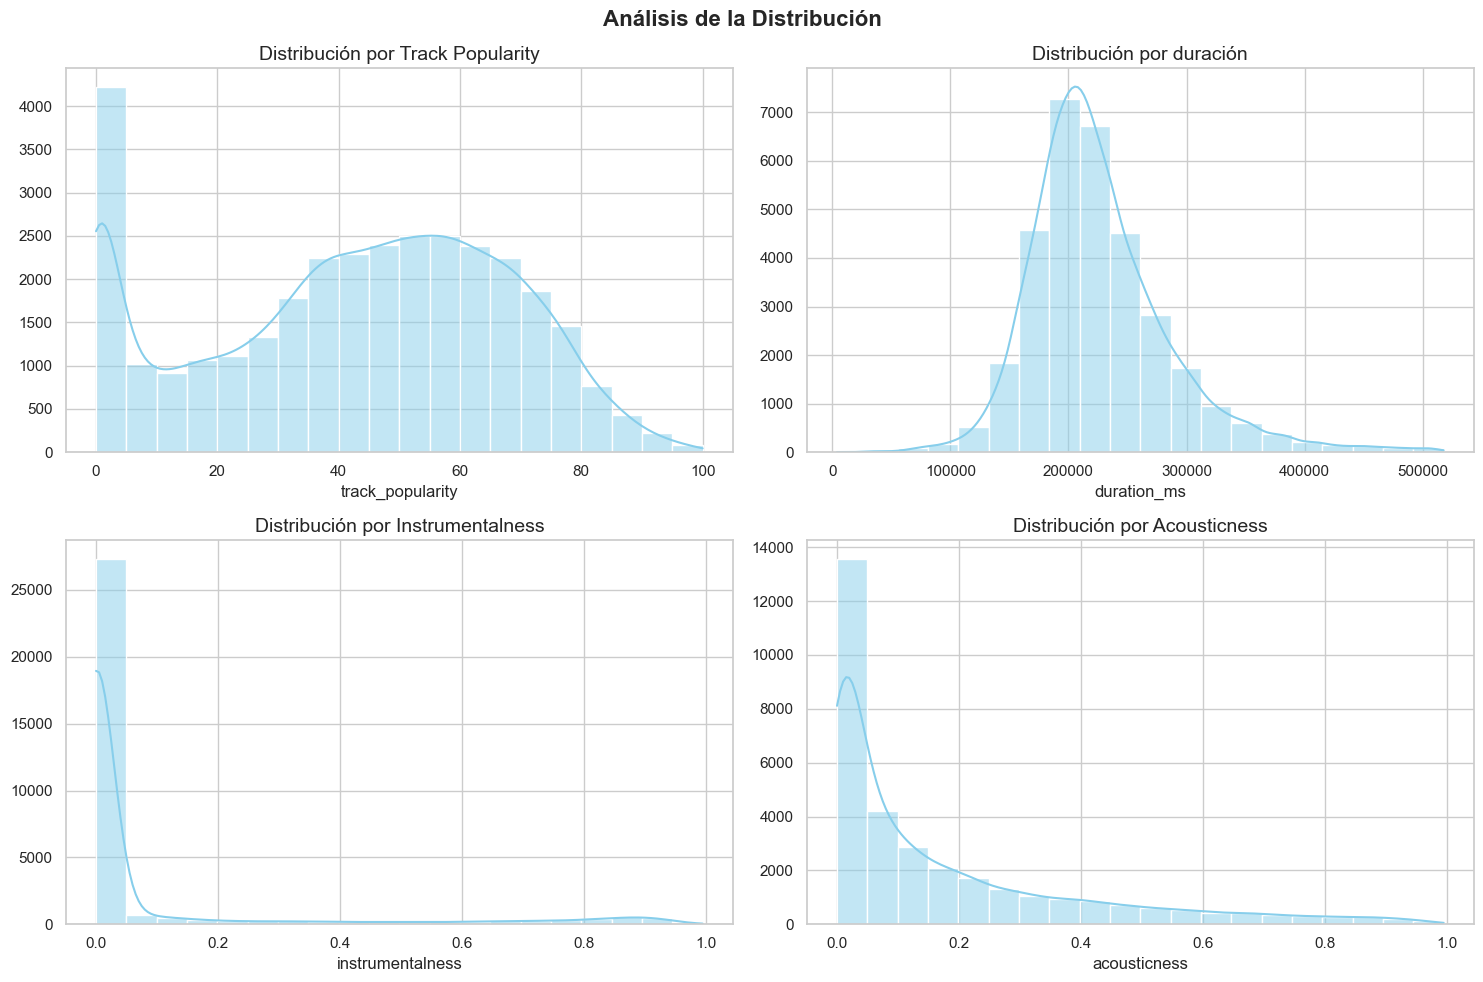

In [444]:
# Análisis de la distribución

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.set(style="whitegrid")
plt.title('Variables con igual rango (0 a 1)', fontsize=14)

# Graficamos la distribución del campo track_popularity
sns.histplot(data=df, x='track_popularity', bins=20, kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Distribución por Track Popularity', fontsize=14)
axes[0, 0].set_ylabel('')

# Graficamos la distribución del campo acousticness
sns.histplot(data=df, x='duration_ms', bins=20, kde=True, color="skyblue", ax=axes[0, 1])
axes[0, 1].set_title('Distribución por duración', fontsize=14)
axes[0, 1].set_ylabel('')

# Graficamos la distribución del campo acousticness
sns.histplot(data=df, x='instrumentalness', bins=20, kde=True, color="skyblue", ax=axes[1, 0])
axes[1, 0].set_title('Distribución por Instrumentalness', fontsize=14)
axes[1, 0].set_ylabel('')

# Graficamos la distribución del campo acousticness
sns.histplot(data=df, x='acousticness', bins=20, kde=True, color="skyblue", ax=axes[1, 1])
axes[1, 1].set_title('Distribución por Acousticness', fontsize=14)
axes[1, 1].set_ylabel('')

plt.suptitle('Análisis de la Distribución', fontsize=16, fontweight='bold')
plt.tight_layout()  # Ajustar layout para evitar solapamientos
plt.show()

Existe un gran número de pistas con 'track_popularity' cercano a 0. Posiblemente porque no han sido rankeadas por falta de escuchas.

La mayoría de las canciones tienen una duración de 3 min 20 seg. Casi no hay pistas por debajo de 1 min 30 seg. En el extremo superior se aprecia una distribución de cola larga.

Tanto 'instrumentalness' como 'acousticness' están muy sesgados hacia la izquierda.

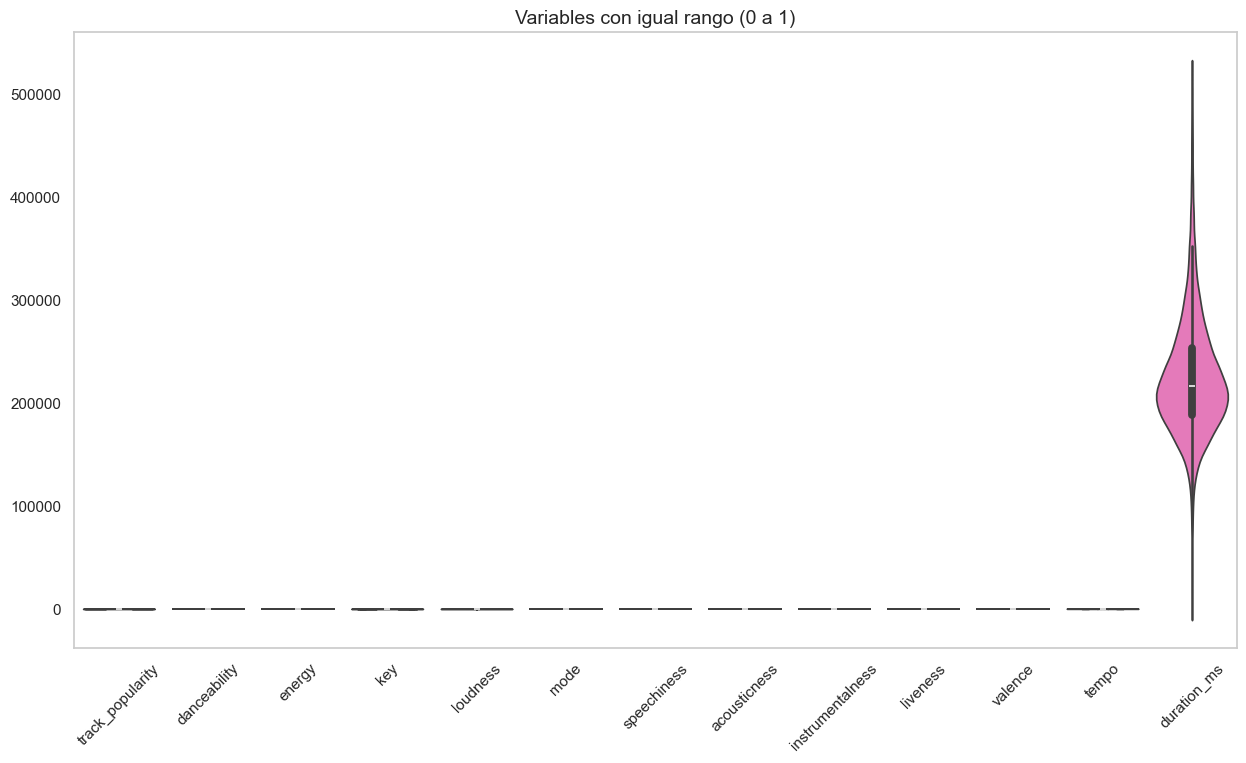

In [445]:
# Violin plot del dataset
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot(data=df)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Decidimos separar las variables 'duration_ms', 'tempo' y 'track_popularity' en violin plot diferentes por tener un rango diferente que impide la visualización.

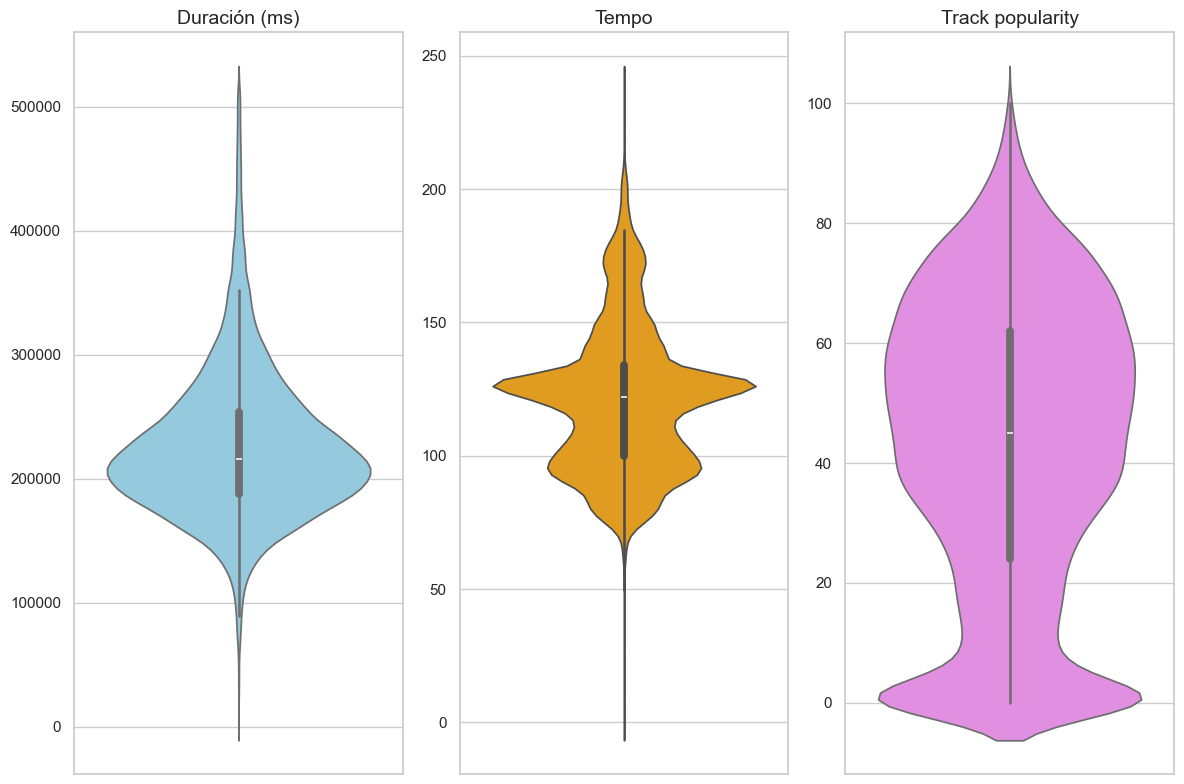

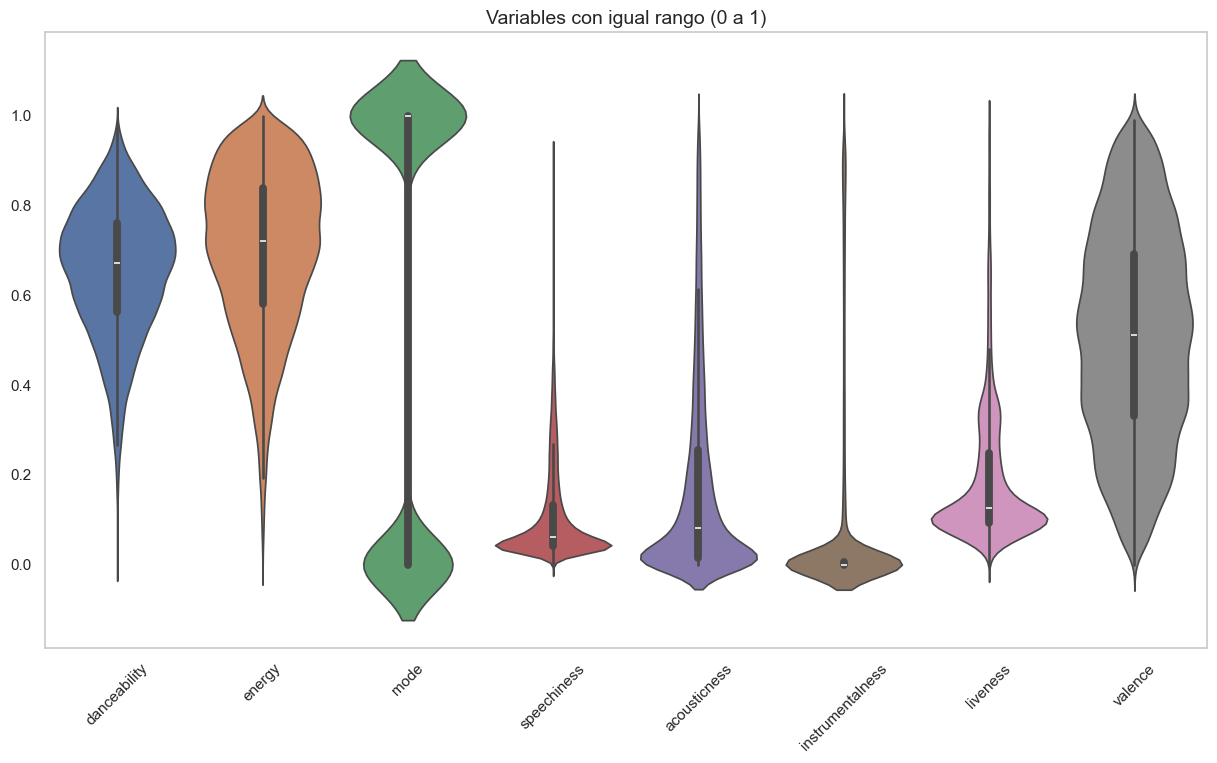

In [446]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

# Primer subplot (fila 0, columna 0)
sns.violinplot(ax=axes[0], data=df['duration_ms'], color='skyblue')
axes[0].set_title('Duración (ms)', fontsize=14)
axes[0].set_ylabel('')

# Segundo subplot (fila 0, columna 1)
sns.violinplot(ax=axes[1], data=df['tempo'], color='orange')
axes[1].set_title('Tempo', fontsize=14)
axes[1].set_ylabel('')

# Tercer subplot (fila 1, columna 0)
sns.violinplot(ax=axes[2], data=df['track_popularity'], color='violet')
axes[2].set_title('Track popularity', fontsize=14)
axes[2].set_ylabel('')
# Ajustar el layout para que los subplots no se solapen
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Violin plot para variables con igual rango (0 a 1)
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot( data=df.drop(['duration_ms','tempo','track_popularity','loudness','key'],axis=1))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

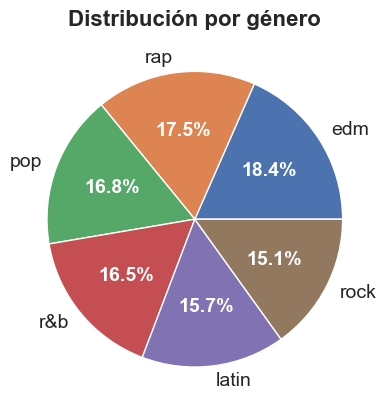

In [447]:
# Estudiamos la distrubición por género
sample = df.groupby('playlist_genre').agg({'track_id': 'count'}).rename(columns={'track_id': 'track_count'}).sort_values(by='track_count', ascending=False)
track_counts = sample['track_count']

wedges, texts, autotexts = plt.pie(
    track_counts,
    labels=sample.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 14}  # Aumenta el tamaño del texto
)

# Aplicar estilos a los porcentajes (autotexts)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Distribución por género', fontsize=16, fontweight='bold')
plt.show()

El dataset se encuentra distribuido uniformemente para cada género.

In [449]:
def año_lanzamiento(date):
    if len(date) == 4:
        año = date
        return año
    else:
        año = pd.to_datetime(date, errors='coerce').year
        return año

In [450]:
df['year'] = df['track_album_release_date'].apply(año_lanzamiento)

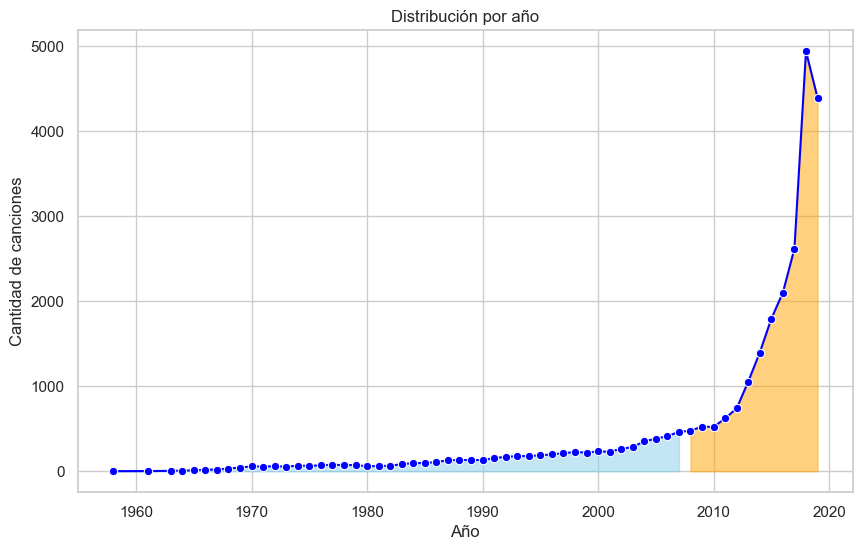

In [451]:
# Estudiamos la distribución de canciones por año
df['year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year

yearly_tracks = df['year'].value_counts().sort_index()
yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()

# Plotting the smoothed trend with annotations and color coding
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_tracks_smoothed.index, y=yearly_tracks_smoothed.values, marker='o', color='blue')
plt.title('Distribución por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones')
plt.grid(True)

max_year = yearly_tracks.idxmax()
max_value = yearly_tracks.max()
plt.annotate(f'Maximum in {max_year}', xy=(max_year, max_value), xytext=(max_year-10, max_value + 500),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index < 2008, color='skyblue', alpha=0.5)
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index >= 2008, color='orange', alpha=0.5)

plt.show()

Queda claro que a partir de 2010 la cantidad de canciones publicadas por año (en Spotify) aumenta notablemente.

Es importante destacar que la aplicación se encuentra disponible desde 2008.

Las canciones publicadas antes de este año podría estar sufriendo un sesgo de supervivencia (sólo se agregan las canciones que han perdurado).

In [452]:
df.sample(15)

track_id  \
11462  36la4AQp7vTlCRNyC5NLry   
30400  3zrYNl1aMdFrQkcOjKVr5u   
30439  1XGmzt0PVuFgQYYnV2It7A   
22668  6UkMcAA19lTdjs22jtB7o2   
6271   0Hk1zuUABam9U5M634R0Fv   
20558  3hmjFpxcBeqX2ValXW9BBs   
3912   00YeYHw6zhoy1y7EPTgIkj   
21350  75wtugYpepfnAzjVH6twz4   
12943  6jmtQXRzJSaryAZQyK8cCI   
21680  6wv9tV7JfZwYak3gC7GD1k   
9691   2x35MVBSpQwBP9ZzQfPhvt   
7006   0lpkIkav4zSnEWoCtlfyBW   
32341  0DkF3I1KiN9wcsNw927f7i   
20673  1WkMMavIMc4JZ8cfMmxHkI   
10939  1IaIbjNFk6i21FyXump6Dz   

                                              track_name  \
11462                                  Cha La Head Chala   
30400                                              I Cry   
30439                                           Payphone   
22668                                    Big Yellow Taxi   
6271                                         Above Water   
20558                                         Ayer La Vi   
3912                                  Shine - Kygo Remix   
21350                                          Real Love   
12943                                              Donna   
21680                                          Paralyzed   
9691                                            Presente   
7006                                             ATL Hoe   
32341                                   Who - Radio Edit   
20673  CAN'T STOP THE FEELING! (Original Song from Dr...   
10939  Revolution (Unlike Pluto Remix) [feat. Faustix...   

                    track_artist  track_popularity          track_album_id  \
11462                     Super3                48  4ASHINW066rVhtYvcsTw0y   
30400                   Flo Rida                57  0wmVf2KCcKnQbAYclahHYb   
30439                   Maroon 5                78  6ijGiBcBfUwkoyHn5VUHU2   
22668              Joni Mitchell                69  7JOdtLDLyXJIppDRB7kxr9   
6271                 Manu Crooks                50  3f6DjtBCACWdOCmcsYD5Is   
20558                   Don Omar                57  3e1gB50UsvBabuMZA90m4F   
3912   Benjamin Francis Leftwich                48  6tUKtq2hrHaWVs5Qokzc1P   
21350       Gotay "El Autentiko"                36  5P3Aem9u2DsEWlUyJOcNGH   
12943    The Inoculated Canaries                19  0vnsHdYHbiaIm3Mhn84PLU   
21680               Florin Gindu                17  5wzG1CO6ECkeHis6ah9fdN   
9691             Control Machete                27  31fEHaKaTwJc7hPH2mc9k2   
7006                     Baby D.                23  0AL297JKQYDpj8CmnpV7TO   
32341                     Tujamo                41  4PuGN5aHY6jv3jqXiLHuS9   
20673          Justin Timberlake                74  65ayND23IInUPHJKsaAqe7   
10939                      Diplo                39  5a8a1Q6YaAtEnfxJIOsIpb   

                                  track_album_name track_album_release_date  \
11462                            3XL Manga i Anime               2002-02-02   
30400                                    Wild Ones               2012-06-22   
30439                   Overexposed Track By Track               2012-01-01   
22668                         Ladies Of The Canyon               1970-03-01   
6271                                   Above Water               2019-10-11   
20558                                   Ayer La Vi               2008-01-01   
3912                            Shine (Kygo Remix)               2014-01-01   
21350                               El Del Vibrato               2013-10-29   
12943                                        Donna               2019-09-20   
21680           A Tribute to Elvis Presley, Vol. 1               2016-10-18   
9691                  Artilleria Pesada, Presenta:               1999-01-01   
7006                              Lil' Chopper Toy                     2002   
32341                                          Who               2012-06-15   
20673  TROLLS (Original Motion Picture Soundtrack)               2016-09-23   
10939                 Revolution (Remixes Part. 2)               2015-06-08   

                 

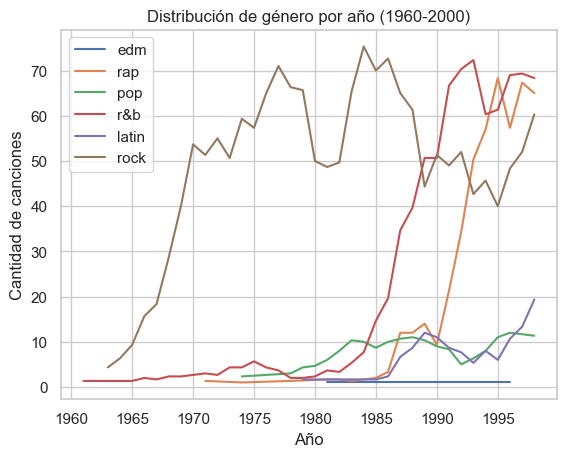

In [453]:
#Distribución de género por año
df_yr = df[df['year'] < 2000]

for i in genres:
    sample = df_yr[df_yr['playlist_genre'] == i]
    yearly_tracks = sample['year'].value_counts().sort_index()
    yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()
    yearly_tracks_smoothed = yearly_tracks_smoothed.dropna()
    plt.plot(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, label=i)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones')
plt.title('Distribución de género por año (1960-2000)')
#plt.yscale('log')
plt.legend()
plt.show()


Puede verse la evolución de los distintos géneros a través de los años.

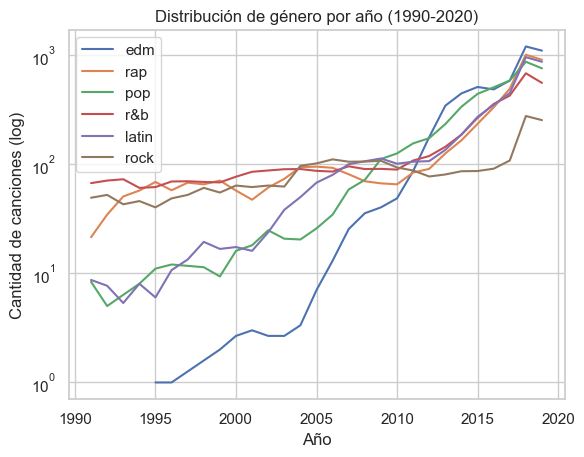

In [454]:
#Distribución de género por año
df_yr = df[df['year'] >= 1990]

for i in genres:
    sample = df_yr[df_yr['playlist_genre'] == i]
    yearly_tracks = sample['year'].value_counts().sort_index()
    yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()
    yearly_tracks_smoothed = yearly_tracks_smoothed.dropna()
    plt.plot(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, label=i)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones (log)')
plt.title('Distribución de género por año (1990-2020)')
plt.yscale('log')
plt.legend()
plt.show()

Es destacable el surgimiento del género 'edm' a partir 1995 y el declino del 'rock' a partir de 2010.

En 2017 se produce un incremento similar de la cantidad de canciones en todos los géneros.

## Limpieza del Dataset

### Identificación de valores nulos

In [455]:
# Vemos la cantidad de valores nulos por cada campo
df.isnull().sum()

track_id               0
track_name             5
track_artist           5
track_popularity       0
track_album_id         0
                    ... 
liveness               0
valence                0
tempo                  0
duration_ms            0
year                1886
Length: 24, dtype: int64

Se identifican 5 pistas que no tienen información de 'track_name' y 'track_artist', posiblemente se trata de las mismas canciones.

In [456]:
# filtramos para ver los registros con valores nulos
null_data = df[df.isnull().any(axis=1)]
null_data

track_id  \
151    2QtJA4gbwe1AcanB2p21aP   
749    77j9HOrxUpWcjwra9jgvio   
750    6rQ9qJPvInEqSzlh89LsPJ   
751    5FgtdSf7I5lClThz2ptWvl   
753    2ahnofp2LbBWDXcJbMaSTu   
...                       ...   
32360  0363w3IUcO4cJMsAFLpfLY   
32767  1h7LBCgfnSUEe7qXRbwMIp   
32774  1NtVWYw9QDr30Ei0phACni   
32775  454ZIylnCq09ONjQE4EJ6a   
32827  0aBDrRTgDCwWbcOnEIp7DJ   

                                              track_name  \
151    Stay The Night - Featuring Hayley Williams Of ...   
749                        We like to Party! (Six Flags)   
750                          Coco Jamboo - Radio Version   
751                                     Blue (Da Ba Dee)   
753                                         What Is Love   
...                                                  ...   
32360                                 Faith - Radio Edit   
32767                                          Push Play   
32774                 Lessons In Love (feat. Neon Trees)   
32775   Turn It Down (with Rebecca & Fiona) - Radio Edit   
32827                             Many Ways - Radio Edit   

                              track_artist  track_popularity  \
151                                   Zedd                61   
749                              Vengaboys                51   
750                          Mr. President                18   
751                              Eiffel 65                16   
753                               Haddaway                70   
...                                    ...               ...   
32360                          Blasterjaxx                 0   
32767                                 Zedd                39   
32774                              Kaskade                23   
32775                              Kaskade                13   
32827  Ferry Corsten feat. Jenny Wahlstrom                27   

               track_album_id                       track_album_name  \
151    4xak0izXQHOMV9Wu1mDAAy                       Clarity (Deluxe)   
749    0R44mmTKUE1XCuGVVrPfTZ       We like to Party! (The Vengabus)   
750    2t8Bc4qBseswbwOoHGHK8d                    We See The Same Sun   
751    65DySolRDG1LNSvRXcWQWN                                Europop   
753    0qTVjeVP70YvQG4GctetOf                   What is Love - Remix   
...                       ...                                    ...   
32360  1IZUFYTXNbjkzgawT7cFpM                                  Faith   
32767  4xak0izXQHOMV9Wu1mDAAy                       Clarity (Deluxe)   
32774  7r47EiktL01BmvI7NHdgcA                             Fire & Ice   
32775  0xiigD6kCGMSv9CcSpJFUr  I Love You, Man (Bonus Track Version)   
32827  59XOfNjuYZB6feC6QUzS3e                              Many Ways   

      track_album_release_date                             playlist_name  \
151                       2012                                 Dance Pop   
749                       1998                            90s Dance Hits   
750                       1996                            90s Dance Hits   
751                       1999                            90s Dance Hits   
753                       1993                            90s Dance Hits   
...                        ...                                       ...   
32360                     2013  Gym (Melbourne Bounce/Progressive House)   
32767                     2012                           ♥ EDM LOVE 2020   
32774                     2011                           ♥ EDM LOVE 2020   
32775                     2011                           ♥ EDM LOVE 2020   
32827                     2013                           ♥ EDM LOVE 2020   

                  playlist_id playlist_genre          playlist_subgenre  \
151    37i9dQZF1DWZQaaqNMbbXa            pop                  dance pop   
749    50cXvxgMGrvoUeLhkzCyIO            pop                  dance pop   
750    50cXvxgMGrvoUeLhkzCyIO            pop                  dance pop   
751    50cXvxgMGrvoUeLhkzCyIO            pop            

Se observó que los features musicales tenían valores normales en relación al resto del dataset. Por ese motivo se decidió conservar estas canciones.

### Tratamiento de duplicados

Verificamos si había canciones ingresadas más de una vez al dataset (mismo track_id) y eliminamos los duplicados.

In [457]:
# Búsqueda de duplicados
duplicate_counts = df['track_id'].value_counts()[df['track_id'].value_counts() > 1]
print(duplicate_counts)

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
3eekarcy7kvN4yt5ZFzltW     9
14sOS5L36385FJ3OL8hew4     9
7LzouaWGFCy4tkXDOOnEyM     8
2b8fOow8UzyDFAE27YhOZM     8
                          ..
6wVViUl2xSRoDK2T7dMZbR     2
3W6WaJa1wRQfbhqotaHtyM     2
7hDVN6GisA47ym0H93NA1Z     2
3F8aTQzmKovktFcR7MCGFW     2
6Nabz5Gsy80XL0MJoOmgF8     2
Name: count, Length: 3166, dtype: int64


In [458]:
df.loc[df['track_id'] == '7BKLCZ1jbUBVqRi2FVlTVw']

track_id             track_name      track_artist  \
133    7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
1731   7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
2478   7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
4535   7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
7369   7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
17467  7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
18358  7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
19770  7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
23784  7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
30629  7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   

       track_popularity          track_album_id       track_album_name  \
133                  85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
1731                 85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
2478                 85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
4535                 85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
7369                 85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
17467                85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
18358                85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
19770                85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
23784                85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
30629                85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   

      track_album_release_date  \
133                 2016-07-29   
1731                2016-07-29   
2478                2016-07-29   
4535                2016-07-29   
7369                2016-07-29   
17467               2016-07-29   
18358               2016-07-29   
19770               2016-07-29   
23784               2016-07-29   
30629               2016-07-29   

                                           playlist_name  \
133                                            Dance Pop   
1731                                       Post pop teen   
2478                          Electropop Hits  2017-2020   
4535               A Loose Definition of Indie Poptimism   
7369   ◤ Hip Hop Dance Music – Urban – Trap – Breakin...   
17467                         Tropical House Run 190 BPM   
18358     2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥   
19770     2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥   
23784     2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥   
30629                                         2015 songs   

                  playlist_id playlist_genre playlist_subgenre  danceability  \
133    37i9dQZF1DWZQaaqNMbbXa            pop         dance pop         0.748   
1731   222nc9tKxKhfZ2GBrOpwH3            pop     post-teen pop         0.748   
2478   7kyvBmlc1uSqsTL0EuNLrx            pop        electropop         0.748   
4535   4ZO0wp9G8FA3X6oYNBzda6            pop   indie poptimism         0.748   
7369   0Hr2h94pKN8QAGVAgD6BsD            rap  southern hip hop         0.748   
17467  37i9dQZF1DWSTc9FdySHtz          latin          tropical         0.748   
18358  4JkkvMpVl4lSioqQjeAL0q          latin         latin pop         0.748   
19770  4JkkvMpVl4lSioqQjeAL0q          latin     latin hip hop         0.748   
23784  4JkkvMpVl4lSioqQjeAL0q            r&b           hip pop         0.748   
30629  6UJw1egIcZVfrBmcKs5uHH            edm           pop edm         0.748   

       energy  key  loudness  mode  speechiness  acousticness  \
133     0.524    8    -5.599     1       0.0338         0.414   
1731    0.524    8    -5.599     1       0.0338         0.414   
2478    0.524    8    -5.599     1       0.0338         0.414   
4535    0.524    8    -5.599     1       0.0338         0.414   
7369    0.524    8    -5.599     1       0.0338         0.414   
17467   0.524    8    -5.599     1       0.0338         0.414   
18358   0.524    8 

Pudimos ver que las entradas duplicadas están en diferentes playlists, pero se trata siempre de la misma canción, con los mismos features musicales.

El único valor conflictivo es 'playlist_genre' ya que no necesariemente es descriptivo del género real de la canción. Decidimos conservar sólo la primer entrada a modo descriptivo.

In [459]:
# Eliminación de duplicados
df = df.drop_duplicates(subset='track_id', keep='first')

In [460]:
# Verificación
duplicate_counts = df['track_id'].value_counts()[df['track_id'].value_counts() > 1]
print(duplicate_counts)

Series([], Name: count, dtype: int64)


### Tratamiento de outliers

#### Variable track_popularity

Identificamos que la presencia de gran cantidad de canciones con valor 0 de 'track_popularity'. Luego de explorar el dataset pensamos que puede deberse a que esas canciones no han recibido suficientes escuchas para establecer su popularidad, lo cual puede deberse a factores externos (ej. falta de promoción, artista desconocido) que exceden la información del presente dataset, en particular a las variables musicales con las que se intenta verificar si existe una correlación.

In [461]:
# Verificamos la cantidad de canciones con track_popularity igual a 0
unpopular_counts = df['track_popularity'] == 0
print(unpopular_counts)
unpopular_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_popularity, Length: 28356, dtype: bool


2620

Con base en el histograma anterior de distribución de 'track_popularity' se determinó realizar un corte de los valores menores a 10, por ser el límite de separación de ambos picos.

In [462]:
# Eliminamos las canciones con track_popularity mayores a 10
df = df[df['track_popularity'] > 10]


In [463]:
# Verificamos la eliminación de canciones con track_popularity igual a 0
unpopular_counts = df['track_popularity'] < 10
print(unpopular_counts)
unpopular_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_popularity, Length: 23196, dtype: bool


0

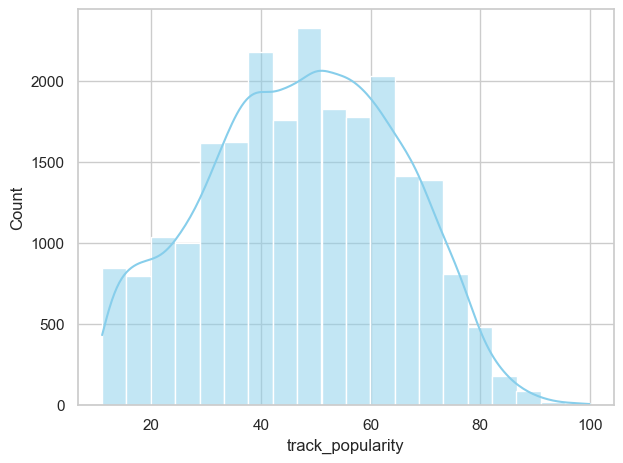

In [464]:
# Verificamos la distribución del campo track_popularity
sns.histplot(data=df, x='track_popularity', bins=20, kde=True, color="skyblue")
plt.tight_layout()  # Ajustar layout para evitar solapamientos
plt.show()

#### Variable tempo

In [465]:
# Detección de outliers por método del desvío estándar.
data = df['tempo']
data_mean, data_std = np.mean(data), np.std(data)
cutoff = data_std*3
lower,upper = data_mean-cutoff, data_mean+cutoff
outliers_idx = np.argwhere((data<lower) | (data>upper))

# Eliminamos las canciones con tempo fuera de los límites establecidos
df = df[(df['tempo'] > lower) & (df['tempo'] < upper)]

print(f"Limite de corte inferior {round(lower,2)} bpm.")
print(f"Limite de corte superior {round(upper,2)} bpm.")
print(f"Se eliminan {len(outliers_idx)} entradas que exceden los límites de tempo.")

Limite de corte inferior 39.69 bpm.
Limite de corte superior 202.22 bpm.
Se eliminan 72 entradas que exceden los límites de tempo.


#### Variable duracion_ms

In [466]:
# Detección de outliers con método del rango intercuartílico (IQR)
# Análisis por cuartiles
data = df['duration_ms']
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
cutoff = iqr * 1.5
lower,upper = q25-cutoff, q75+cutoff
outliers_idx = np.argwhere((data<lower) | (data>upper))

# Análisis por percentiles
q15, q85 = np.percentile(data, 15), np.percentile(data, 85)
iqr_per = q85 - q15
cutoff_per = iqr * 1.5
lower_per,upper_per = q15-cutoff_per, q85+cutoff_per
outliers_idx_per = np.argwhere((data<lower_per) | (data>upper_per))

In [467]:
print('Análisis por cuartiles:')
print('Límite inferior ',lower)
print('Límite superior ',upper)

Análisis por cuartiles:
Límite inferior  88289.75
Límite superior  347783.75


In [468]:
print('Análisis por percentiles:')
print('Límite inferior ',lower_per)
print('Límite superior ',upper_per)

Análisis por percentiles:
Límite inferior  73305.0
Límite superior  372711.8


Decidimos realizar el corte únicamente por el percentil inferior. Es decir, pistas con una duración menor a 1,2 min.

In [469]:
# Eliminamos las canciones con duración fuera de los límites establecidos
df = df[df['duration_ms'] > lower_per]
outliers_idx_per = np.argwhere(data<lower_per)
print(f"Limite de corte inferior {round(lower_per,2)} ms.")
print(f"Se eliminan {len(outliers_idx_per)} entradas por debajo del límite de duración.")

Limite de corte inferior 73305.0 ms.
Se eliminan 39 entradas por debajo del límite de duración.


#### Variable loudness

Identificamos que algunos outliers en la variable loudness, que presentaban pistas con un "volumen" extremadamente bajo.

In [470]:
# Verificamos la cantidad de canciones con loudness menor a -30 dB
low_loudness_counts = df['loudness'] < -30
print(low_loudness_counts)
print(f"Se identifica un total de {low_loudness_counts.sum()} pistas.")

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 23085, dtype: bool
Se identifica un total de 4 pistas.


In [471]:
df[df['loudness'] < -30]

track_id  \
17008  34v7cD6VR3fVYguedQ1wuh   
17010  28ilcqErfNjitJ7T3byHoX   
17016  61SiFnjiY36uVSTBVXK5Yw   
17018  5iAB4tlYseBES4MKqgY4KG   

                                              track_name  \
17008                                    Tropical Forest   
17010                                    Peaceful Forest   
17016  The Sound Of The Jungle With Coloured Birds Fo...   
17018                    Relaxing Crickets And Waterfall   

               track_artist  track_popularity          track_album_id  \
17008  The Sleep Specialist                54  3TRoUn8OKRVUcbprXmyGgj   
17010  The Sleep Specialist                51  3TRoUn8OKRVUcbprXmyGgj   
17016    Life Sounds Nature                44  5qukUq6sBLjghcEcFOdgKP   
17018  Natural Sound Makers                52  2GLxsxoWpW8MOw9O9AAsf9   

                                        track_album_name  \
17008                           Jungle And Forest Sounds   
17010                           Jungle And Forest Sounds   
17016  The Very Best Sound Of Nature - Birds, Waves, ...   
17018                                    Forest By Night   

      track_album_release_date    playlist_name             playlist_id  \
17008               2017-01-09  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   
17010               2017-01-09  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   
17016               2015-04-01  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   
17018               2017-01-09  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   

      playlist_genre playlist_subgenre  danceability    energy  key  loudness  \
17008          latin          tropical        0.3110  0.377000    3   -36.509   
17010          latin          tropical        0.2110  0.425000    7   -46.448   
17016          latin          tropical        0.2260  0.442000   11   -36.624   
17018          latin          tropical        0.0787  0.000175    7   -35.960   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
17008     0       0.0366        0.1290             0.979    0.2470   0.0388   
17010     0       0.0542        0.8800             0.613    0.1840   0.0122   
17016     0       0.0562        0.0509             0.136    0.0791   0.0234   
17018     1       0.0580        0.1180             0.972    0.0793   0.0116   

         tempo  duration_ms    year  
17008   84.122       117449  2017.0  
17010  116.884       181204  2017.0  
17016   77.998        93010  2015.0  
17018  169.062       264154  2017.0

Decidimos eliminarlos por no tratarse de pistas musicales, son grabaciones de sonidos de la naturaleza.

In [472]:
# Eliminamos las canciones con loudness menor a -30 dB
df = df[df['loudness'] > -30]

In [473]:
# Verificamos la eliminacion de las canciones con loudness menor a -30 dB
low_loudness_counts = df['loudness'] < -30
print(low_loudness_counts)
low_loudness_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 23081, dtype: bool


0

In [474]:
#ELIMINAR!!
df_bu = df.copy()

In [475]:
#ELIMINAR!!
df = df_bu.copy()

## Transformación de Variables y Selección de Features

### Eliminación de features string

Eliminamos los features string que describen la pista, el album o la playlist. Únicamente conservamos 'track_id' para referencia y 'playlist_genre' que será usada más adelante.

In [476]:
df.drop(columns=['track_name', 'track_artist', 'track_album_id', 'track_album_name',  'playlist_subgenre', 'track_album_release_date', 'playlist_name', 'playlist_id'], inplace=True)

### Transformación de fetures musicales continuos en categóricos

In [508]:
df_cat = df.copy()

In [509]:
#LIMITES
# danceability: > 0.5 -> bailable
# speechiness: > 0.66 -> speech
# acousticness: > 0.5 -> acoustic 
# intstrumentalness: > 0.5 -> intstrumental 
# liveness: > 0.8 -> live 
# valence: 1 = positiva / 0 = negativa

df_cat.loc[:, 'danceability'] = df_cat['danceability'] > 0.5
df_cat.loc[:, 'speechiness'] = df_cat['speechiness'] > 0.66
df_cat.loc[:, 'acousticness'] = df_cat['acousticness'] > 0.5
df_cat.loc[:, 'instrumentalness'] = df_cat['instrumentalness'] > 0.5
df_cat.loc[:, 'liveness'] = df_cat['liveness'] > 0.8
df_cat.loc[:, 'valence'] = df_cat['valence'] > 0.5

/var/folders/83/9353kc_5517028y13dxby8y40000gn/T/ipykernel_62142/845413608.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ True  True  True ...  True  True  True]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cat.loc[:, 'danceability'] = df_cat['danceability'] > 0.5
/var/folders/83/9353kc_5517028y13dxby8y40000gn/T/ipykernel_62142/845413608.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False False ... False False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cat.loc[:, 'speechiness'] = df_cat['speechiness'] > 0.66
/var/folders/83/9353kc_5517028y13dxby8y40000gn/T/ipykernel_62142/845413608.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False

In [510]:
df_cat.describe()

track_popularity        energy           key      loudness  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.698619      5.374471     -6.719499   
std           24.984074      0.180910      3.611657      2.988436   
min            0.000000      0.000175      0.000000    -46.448000   
25%           24.000000      0.581000      2.000000     -8.171000   
50%           45.000000      0.721000      6.000000     -6.166000   
75%           62.000000      0.840000      9.000000     -4.645000   
max          100.000000      1.000000     11.000000      1.275000   

               mode         tempo    duration_ms  
count  32833.000000  32833.000000   32833.000000  
mean       0.565711    120.881132  225799.811622  
std        0.495671     26.903624   59834.006182  
min        0.000000      0.000000    4000.000000  
25%        0.000000     99.960000  187819.000000  
50%        1.000000    121.984000  216000.000000  
75%        1.000000    133.918000  253585.000000  
max        1.000000    239.440000  517810.000000

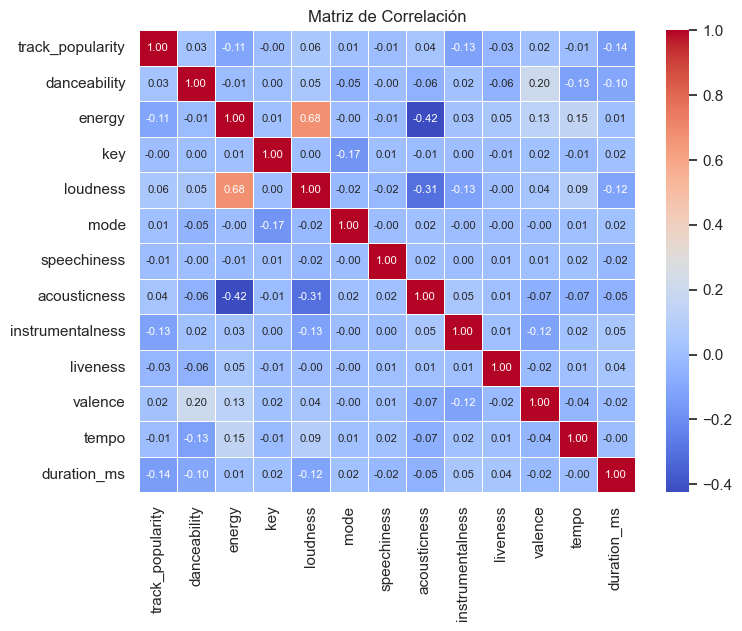

In [511]:
# Seleccionar solo columnas numéricas
numeric_df = df_cat.select_dtypes(include=['number', 'bool'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Puede verse que esta transformación empeora en todos los casos la correlación, por lo que será desestimada.

### Escalado de features numéricas

Realizamos un escalado 'MinMaxScaler' para trabajar con valores de rango [0, 1] en todas las features.

In [477]:
# Escalado de variables
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[['track_popularity','loudness','tempo','duration_ms','year']] = scaler.fit_transform(df[['track_popularity','loudness','tempo','duration_ms','year']])
df_scaled.describe()

track_popularity  danceability        energy           key  \
count      23081.000000  23081.000000  23081.000000  23081.000000   
mean           0.411510      0.656292      0.692901      5.353104   
std            0.197534      0.145038      0.183074      3.617693   
min            0.000000      0.077100      0.011800      0.000000   
25%            0.269663      0.564000      0.573000      2.000000   
50%            0.415730      0.673000      0.716000      6.000000   
75%            0.561798      0.762000      0.836000      9.000000   
max            1.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  23081.000000  23081.000000  23081.000000  23081.000000   
mean       0.737928      0.566613      0.107680      0.183468   
std        0.096845      0.495554      0.102151      0.225487   
min        0.000000      0.000000      0.022400      0.000001   
25%        0.690556      0.000000      0.040900      0.016100   
50%        0.755643      1.000000      0.062400      0.085800   
75%        0.805520      1.000000      0.133000      0.272000   
max        1.000000      1.000000      0.918000      0.992000   

       instrumentalness      liveness       valence         tempo  \
count      23081.000000  23081.000000  23081.000000  23081.000000   
mean           0.085304      0.188438      0.509312      0.469421   
std            0.225892      0.152531      0.232680      0.173978   
min            0.000000      0.009360      0.000010      0.000000   
25%            0.000000      0.092700      0.329000      0.334020   
50%            0.000016      0.126000      0.510000      0.477115   
75%            0.004810      0.243000      0.691000      0.558260   
max            0.994000      0.996000      0.991000      1.000000   

        duration_ms          year  
count  23081.000000  21810.000000  
mean       0.336007      0.881225  
std        0.131468      0.165654  
min        0.000000      0.000000  
25%        0.252155      0.857143  
50%        0.315769      0.952381  
75%        0.398182      0.984127  
max        1.000000      1.000000

### Corrección de skewness

Aplicamos un proceso de corrección del sesgo (skewness) analizando distintas transformaciones posibles para normalizar cada feature numérico intentando aproximarlo a una distribución gausiana. Se utiliza la transformación que mejor se adapta a los datos.

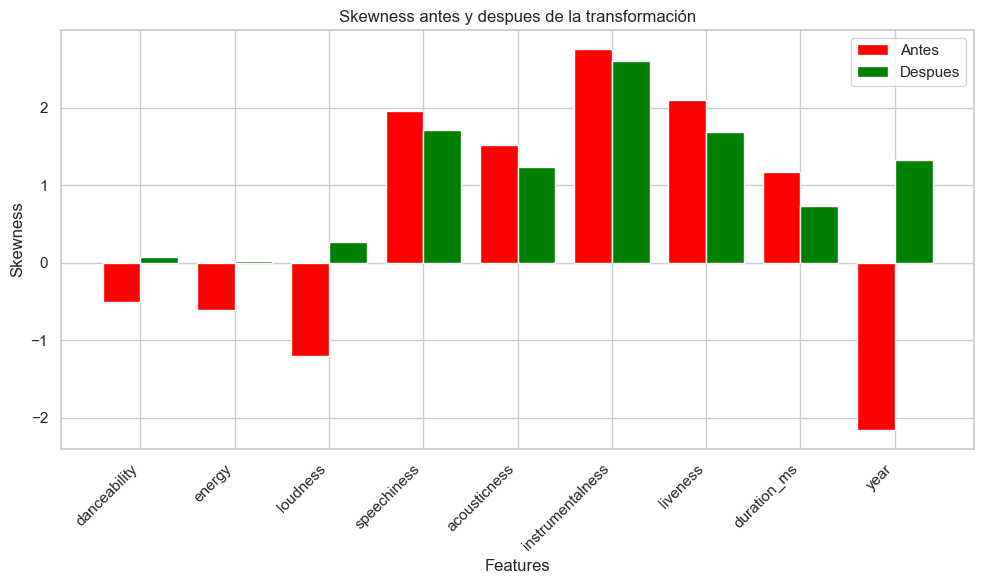

In [491]:
skew_df = pd.DataFrame(columns=['feature', 'before', 'after', 'transformer'])

def remove_skewness(feature, df_scaled):

    skew = df_scaled[feature].skew()
    output = df_scaled[feature]
    row = [feature, skew, 0, 'None'] 
    transformers = [np.log1p, np.sqrt] if skew > 0 else [np.square, np.exp, lambda x: x**3]
    
    for transformer in transformers:
        sample = transformer(df_scaled[feature] + 1) if transformer == np.sqrt else transformer(df_scaled[feature])
        if abs(sample.skew()) < abs(skew):
            skew = abs(sample.skew())
            output = sample
            row[2] = skew  
            row[3] = transformer._name_ if hasattr(transformer, '_name_') else str(transformer)

    skew_df.loc[len(skew_df)] = row
    return output

categorical_feat = []
numerical_feat = []

#Separamos nuestro dataset entre variables numericas y categoricas
for col in df_scaled.columns:
  if df_scaled[col].dtype == 'object':
    categorical_feat.append(col)
  else:
    numerical_feat.append(col)
  
skewed_features = [feat for feat in numerical_feat if abs(df_scaled[feat].skew()) >= 0.5]

#Aplicamos el skew solo a las variables numericas
for feat in skewed_features:
  df_scaled[feat] = remove_skewness(feat, df_scaled)

#Graficamos
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
index = range(len(skew_df))
bars_before = ax.bar(index, skew_df['before'], bar_width, label='Antes', color='red')
bars_after = ax.bar([i + bar_width for i in index], skew_df['after'], bar_width, label='Despues', color='green')
ax.set_xlabel('Features')
ax.set_ylabel('Skewness')
ax.set_title('Skewness antes y despues de la transformación')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(skew_df['feature'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

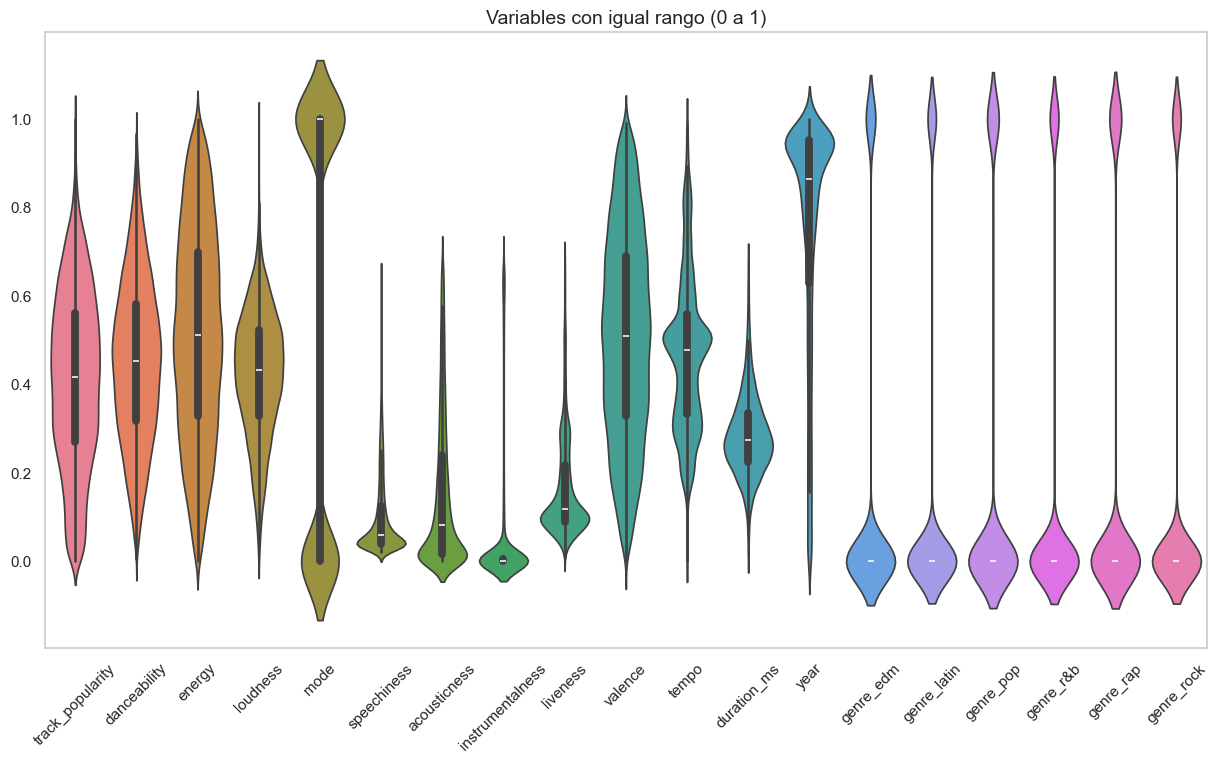

In [506]:
# Violin plot para variables con igual rango (0 a 1)
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot(data=df_scaled)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Análisis de Tonalidad ('Key')

Aplicamos One Hot Encoding para crear variables dummies del feature 'key' (cada entero representa una tonalidad diferente). 

In [492]:
df_scaled['key'] = df_scaled['key'].astype(int)

# Realizar el one-hot encoding para la variable key
one_hot_encoded = pd.get_dummies(df_scaled['key'], prefix='key')

# Creamos un nuevo DataFrame one-hot encoded para key
df_key = pd.concat([df_scaled, one_hot_encoded], axis=1)

Observamos la correlación de cada tonalidad con 'track_popularity'

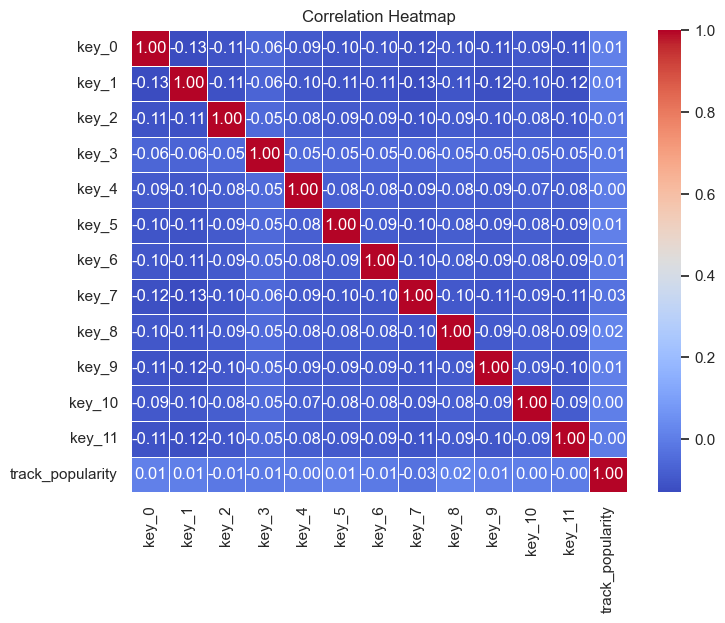

In [493]:
subset = []
subset = df_key[[col for col in df_key.columns if col.startswith('key_')] + ['track_popularity']]

# Calculate the correlation matrix
corr_matrix = subset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Dado que la tonalidad (key) no presenta correlación con 'track_popularity' será desestimada.

In [494]:
df_scaled.drop(columns=['key'], inplace=True)

### One Hot Encoding para género

In [495]:
# Aplicar One Hot Encoding a la variable playlist_genre
df_scaled = pd.get_dummies(df_scaled, columns=['playlist_genre'], prefix='genre')
df_scaled.columns

Index(['track_id', 'track_popularity', 'danceability', 'energy', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'year', 'genre_edm', 'genre_latin',
       'genre_pop', 'genre_r&b', 'genre_rap', 'genre_rock'],
      dtype='object')

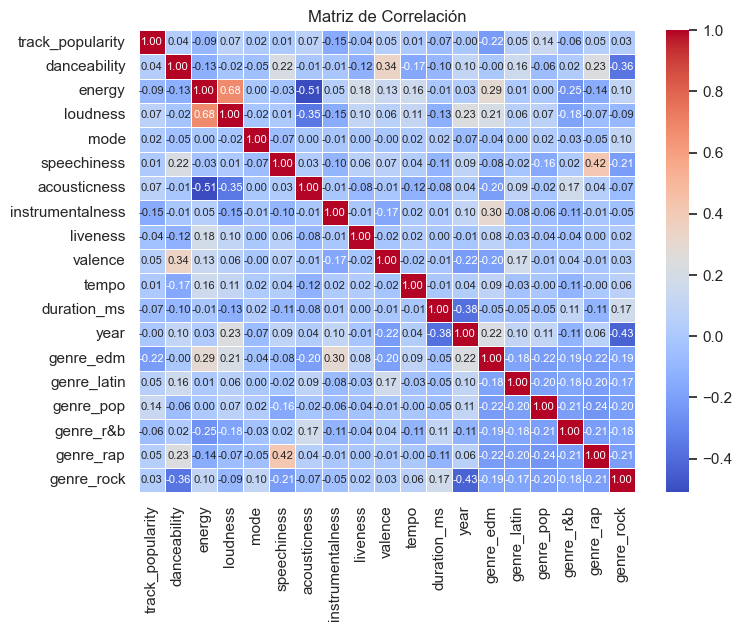

In [497]:
# Seleccionar solo columnas numéricas
numeric_df = df_scaled.select_dtypes(include=['number', 'bool'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

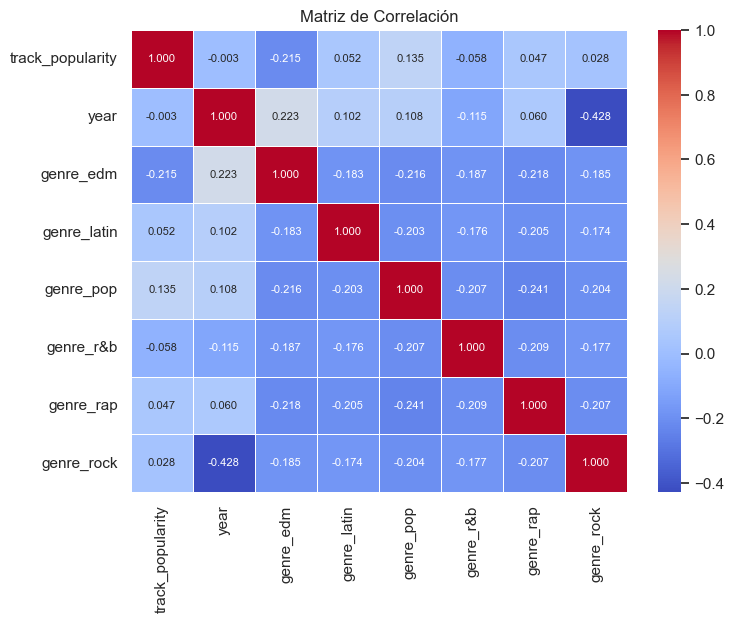

In [505]:
# Seleccionar solo columnas numéricas
numeric_df = df_scaled.select_dtypes(include=['number', 'bool'])
numeric_df.drop(columns=['danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'], inplace=True)

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', annot_kws={"size": 8}, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Se observa una correlación entre el año y el género, particularmente "rock" y "edm". Esto se debe a que la cantidad de pistas de "rock" ha disminuido con los años.

"Edm" aparece en el dataset a partir del 2000, siendo el género más reciente.

## Reducción de la Dimensionalidad